<a href="https://colab.research.google.com/github/IrakizaGaius/PeerGroup8WaterQualityModel/blob/main/Peer_Group_8__formative_II__David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
#LOAD THE DATA

import pandas as pd
import numpy as np
import tensorflow as tf
data = pd.read_csv("/content/water_potability.csv")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

data.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
# Information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Brief overview of the dataset statistics
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# drop duplicates rows of data

data = data.drop_duplicates()

In [ ]:
# percentage of missingness in the data for each column

missing = data.isnull().mean()*100
print(missing)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [ ]:
# MICE IMPUTATION to fill the missing data
# create the imputer using MICE

# separate the target variable from the rest of the data to make sure it is not changed or imputed
features = data.drop(columns='Potability')
target = data.Potability
imputer = IterativeImputer(random_state=0)
features_imputed = imputer.fit_transform(features)

# convert the data back into a dataframe
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

# merge target variable and data
data_imputed = pd.concat([features_imputed, target], axis=1)
data_imputed.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190863,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,344.836463,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,331.981769,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,6.927779,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
# confirm imputed data
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Remove outliers that may affect the neural network's accuracy using IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # anything above or below this is an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # place outliers in a data frame
    print(f"{df[column_name]}")
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

    # remove outliers

    df_clean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_clean

# columns to remove outliers in
columns = ['Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

data_imputed_copy = data_imputed.copy()

for i in columns:
  data_imputed_copy = remove_outliers_iqr(data_imputed_copy, i)

0       204.890455
1       129.422921
2       224.236259
3       214.373394
4       181.101509
           ...    
3271    193.681735
3272    193.553212
3273    175.762646
3274    230.603758
3275    195.102299
Name: Hardness, Length: 3276, dtype: float64
Number of outliers: 83
Percentage of outliers: 2.53%
0       20791.318981
1       18630.057858
2       19909.541732
3       22018.417441
4       17978.986339
            ...     
3271    47580.991603
3272    17329.802160
3273    33155.578218
3274    11983.869376
3275    17404.177061
Name: Solids, Length: 3193, dtype: float64
Number of outliers: 42
Percentage of outliers: 1.32%
0       368.516441
1       344.836463
2       331.981769
3       356.886136
4       310.135738
           ...    
3270    345.700257
3272    338.612062
3273    326.848982
3274    336.993878
3275    338.025733
Name: Sulfate, Length: 3151, dtype: float64
Number of outliers: 230
Percentage of outliers: 7.30%
0       564.308654
1       592.885359
2       418.606213
3 

Plot the Data Appropriately

In [ ]:

# generate 2d classification dataset
# X, y = pass

# Transforms data to have mean=0 and standard deviation=1

scaler = StandardScaler()

X = data_imputed_copy.drop(columns='Potability', axis=1)
y= data_imputed_copy['Potability']

X_scaled = scaler.fit_transform(X)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_2d_pca = pca.fit_transform(X_scaled)

X_scaled.shape


(2830, 9)

In [ ]:

# Split the data into training validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3,random_state=42,
    stratify=y               # Keep same class distribution in all splits
)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp)

print(f"\n=== FINAL SHAPES ===")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")
print(f"y_test: {y_test.shape}")




=== FINAL SHAPES ===
X_train: (1981, 9)
X_val: (424, 9)
X_test: (425, 9)
y_train: (1981,)
y_val: (424,)
y_test: (425,)


# Each Member Defines their model Here

In [ ]:
#Model Definition by member 3 (RMSprop variant)
def model_david():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation="relu",
                                   kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
  model.add(tf.keras.layers.Dense(64, activation="relu",
                                   kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
  model.add(tf.keras.layers.Dense(32, activation="relu",
                                   kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
  model.add(tf.keras.layers.Dense(1, activation="sigmoid",
                                   kernel_regularizer=tf.keras.regularizers.l2(0.0005)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss="binary_crossentropy", metrics=["accuracy"])
  return model

model3 = model_david()

# Early stopping callback
early_stopping_3 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=50,
    restore_best_weights=True
)

# Train the model
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping_3]
)



Epoch 1/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6406 - loss: 0.7338 - val_accuracy: 0.6321 - val_loss: 0.7122
Epoch 2/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 0.7081 - val_accuracy: 0.6344 - val_loss: 0.6951
Epoch 3/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.6631 - val_accuracy: 0.6439 - val_loss: 0.6850
Epoch 4/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.6631 - val_accuracy: 0.6533 - val_loss: 0.6786
Epoch 5/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.6464 - val_accuracy: 0.6462 - val_loss: 0.6752
Epoch 6/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6850 - loss: 0.6381 - val_accuracy: 0.6533 - val_loss: 0.6671
Epoch 7/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.6384 - val_accuracy: 0.6533 - val_loss: 0.6712
Epoch 8/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.6256 - val_accuracy: 0.6557 - v

In [ ]:
# Get best epoch based on validation loss
best_epoch = history3.history['val_loss'].index(min(history3.history['val_loss']))

# Get train and validation accuracy at best epoch
train_acc_at_best = history3.history['accuracy'][best_epoch]
val_acc_at_best = history3.history['val_accuracy'][best_epoch]

print(f"Best Epoch: {best_epoch + 1}")  # +1 for human-readable epoch number
print(f"Train Accuracy at Best Epoch: {train_acc_at_best:.4f}")
print(f"Validation Accuracy at Best Epoch: {val_acc_at_best:.4f}")


Best Epoch: 16
Train Accuracy at Best Epoch: 0.7314
Validation Accuracy at Best Epoch: 0.6934


In [ ]:


# Predict probabilities
y_pred_probs = model3.predict(X_test).ravel()

# Predict binary classes
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Evaluate loss and accuracy
test_loss, test_accuracy = model3.evaluate(X_test, y_test, verbose=0)

# Calculate precision, recall, and F1_score
test_precision = precision_score(y_test, y_pred_classes)
test_recall = recall_score(y_test, y_pred_classes)
test_auc = roc_auc_score(y_test, y_pred_probs)

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1_score: {test_auc:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Loss: 0.6773
Test Accuracy: 0.6447
Test Precision: 0.5238
Test Recall: 0.4204
Test AUC: 0.6710


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:

              precision    recall  f1-score   support

           0     0.7215    0.8022    0.7597       268
           1     0.5827    0.4713    0.5211       157

    accuracy                         0.6800       425
   macro avg     0.6521    0.6368    0.6404       425
weighted avg     0.6702    0.6800    0.6716       425



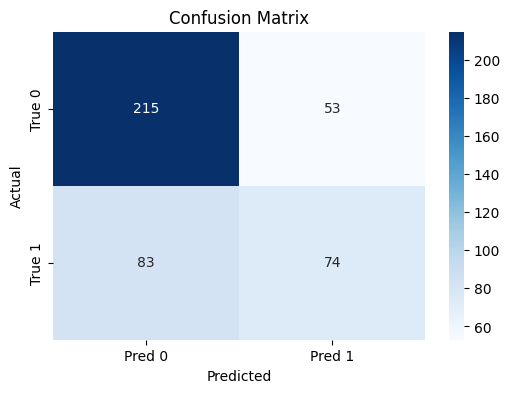

In [ ]:
#Classification report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary class predictions (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Start the training Process

In [ ]:

#fit model
history = model.fit(X, Y, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

NameError: name 'Y' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy

In [ ]:
#Data Loading and Preprocessing
# The coach will never do this!!
regularizer = 'l1'

In [ ]:
model = Sequential()
model.add(Dense(32, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
model.add(Dropout(0.2))
#adding Dropout
model.add(Dense(64, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
#adding Dropout
model.add(Dense(128, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
model.add(Dropout(0.2))
#adding Dropout
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
callback =EarlyStopping(monitor='loss',patience=3)

In [ ]:
model.compile(optimizer='adam', loss= 'rmse', metrics = ['accuracy'])

In [ ]:
model.fit(X, Y, epochs=1000, batch_size= 128, callbacks=[callback], verbose=0)

In [ ]:
model.summary()